# Explore here

In [38]:
# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import warnings

In [39]:
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

df=df[["Latitude","Longitude","MedInc"]]
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [40]:
# Dividimos la muestra en train y test al 80%
df_train, df_test = train_test_split(df, random_state = 42, train_size = 0.80)
df_test.shape, df_train.shape

((4128, 3), (16512, 3))

### Modelado

In [41]:
# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(df_train)

KMeans(n_clusters=6, random_state=42)

In [42]:
labels = model.labels_
df_train["cluster"]=labels
df_train['cluster'] = df_train['cluster'].astype('category')
df_train

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5
...,...,...,...,...
11284,33.78,-117.96,6.3700,2
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,0


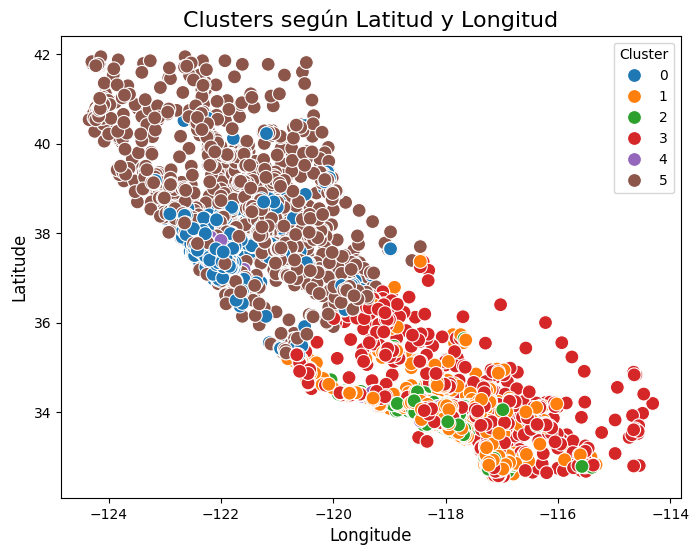

In [43]:
# Graficar Latitud vs Longitud con colores por cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Longitude', y='Latitude',
    hue='cluster', data=df_train,
    palette='tab10', s=100
)
plt.title('Clusters según Latitud y Longitud', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Cluster')
plt.show()

Con respecto a la latitud y longitud, podemos visualizar dos grandes cluster, en uno se encuentran las clases 0, 4 y 5 (estando más al norte y más al oeste) mientras que en el otro cluster podemos agrupar a las clases 1, 2 y 3 (que se ubican más al sur y al este). La tercera variable MedInc debe tener gran influencia en cómo dividir las clases en los 6 grupos.

/tmp/ipykernel_2602/1756329872.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(cm.get_cmap('tab10').colors[:6])


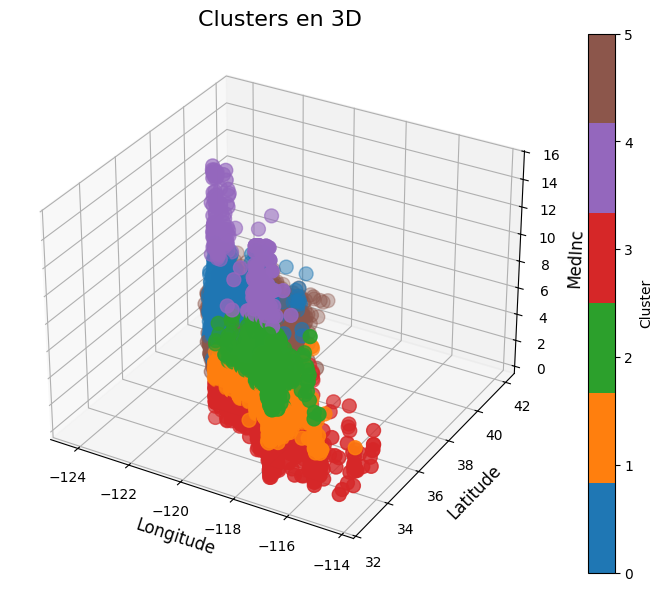

In [44]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear un colormap con 6 colores
cmap = ListedColormap(cm.get_cmap('tab10').colors[:6])

# Graficar en 3D con colores corregidos
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_train['Longitude'], df_train['Latitude'], df_train['MedInc'],
    c=df_train['cluster'].cat.codes,  # Asegurar que sea numérico para el cmap
    cmap=cmap, s=100
)

ax.set_title('Clusters en 3D', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_zlabel('MedInc', fontsize=12)

# Barra de colores
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
cbar.set_ticks(range(6))  # Mostrar solo los 6 clusters
cbar.set_ticklabels([0, 1, 2, 3, 4, 5])  # Etiquetar correctamente
plt.show()

/tmp/ipykernel_2602/2019997169.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(cm.get_cmap('tab10').colors[:6])


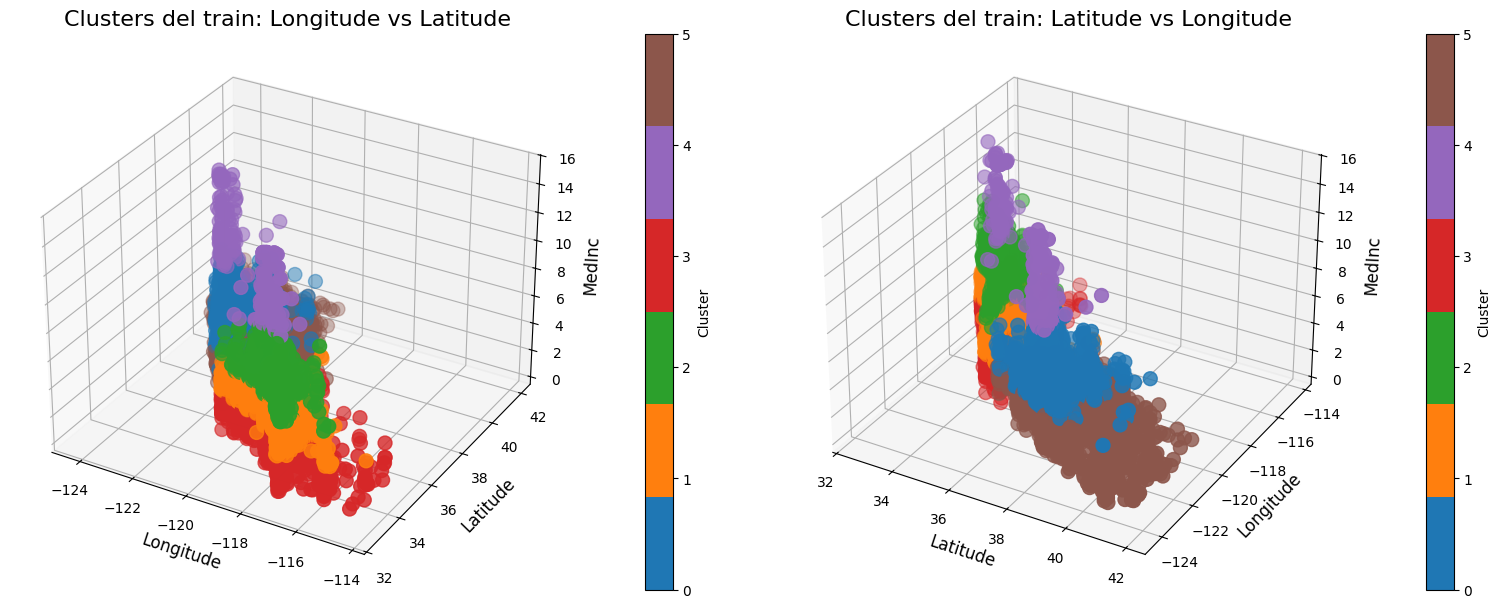

In [50]:
# Crear un colormap con 6 colores
cmap = ListedColormap(cm.get_cmap('tab10').colors[:6])

# Configurar los subplots
fig = plt.figure(figsize=(16, 6))  # Ajusta el tamaño (ancho, alto)

# Primer gráfico: Longitude vs Latitude
ax1 = fig.add_subplot(121, projection='3d')  # 1 fila, 2 columnas, posición 1
scatter1 = ax1.scatter(
    df_train['Longitude'], df_train['Latitude'], df_train['MedInc'],
    c=df_train['cluster'].cat.codes,  # Convertir a códigos numéricos para colores
    cmap=cmap, s=100
)
ax1.set_title('Clusters del train: Longitude vs Latitude', fontsize=16)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)
ax1.set_zlabel('MedInc', fontsize=12)

# Barra de colores para el primer gráfico
cbar1 = plt.colorbar(scatter1, ax=ax1, pad=0.1)  # Pad ajusta la distancia entre barra y gráfico
cbar1.set_ticks(range(6))
cbar1.set_ticklabels([0, 1, 2, 3, 4, 5])
cbar1.set_label('Cluster')

# Segundo gráfico: Latitude vs Longitude
ax2 = fig.add_subplot(122, projection='3d')  # 1 fila, 2 columnas, posición 2
scatter2 = ax2.scatter(
    df_train['Latitude'], df_train['Longitude'], df_train['MedInc'],
    c=df_train['cluster'].cat.codes,  # Convertir a códigos numéricos para colores
    cmap=cmap, s=100
)
ax2.set_title('Clusters del train: Latitude vs Longitude', fontsize=16)
ax2.set_xlabel('Latitude', fontsize=12)
ax2.set_ylabel('Longitude', fontsize=12)
ax2.set_zlabel('MedInc', fontsize=12)

# Barra de colores para el segundo gráfico
cbar2 = plt.colorbar(scatter2, ax=ax2, pad=0.1)
cbar2.set_ticks(range(6))
cbar2.set_ticklabels([0, 1, 2, 3, 4, 5])
cbar2.set_label('Cluster')

# Mostrar los gráficos
plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()

Aquí podemos observar que las clases 3 y 5 son las de menor valor MedInc, luego le siguen las clases 0 y 1, luego la clase 2 y por último la clase 4 es la de mayor valor MedInc.

### Paso 4:

In [45]:
predictions = model.predict(df_test)
df_test["predictions"]=predictions
df_test['predictions'] = df_test['predictions'].astype('category')
df_test


,Latitude,Longitude,MedInc,predictions
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5
...,...,...,...,...
15362,33.36,-117.22,4.6050,1
16623,35.36,-120.83,2.7266,5
18086,37.31,-122.05,9.2298,4
2144,36.77,-119.76,2.7850,5


/tmp/ipykernel_2602/3966181647.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(cm.get_cmap('tab10').colors[:6])


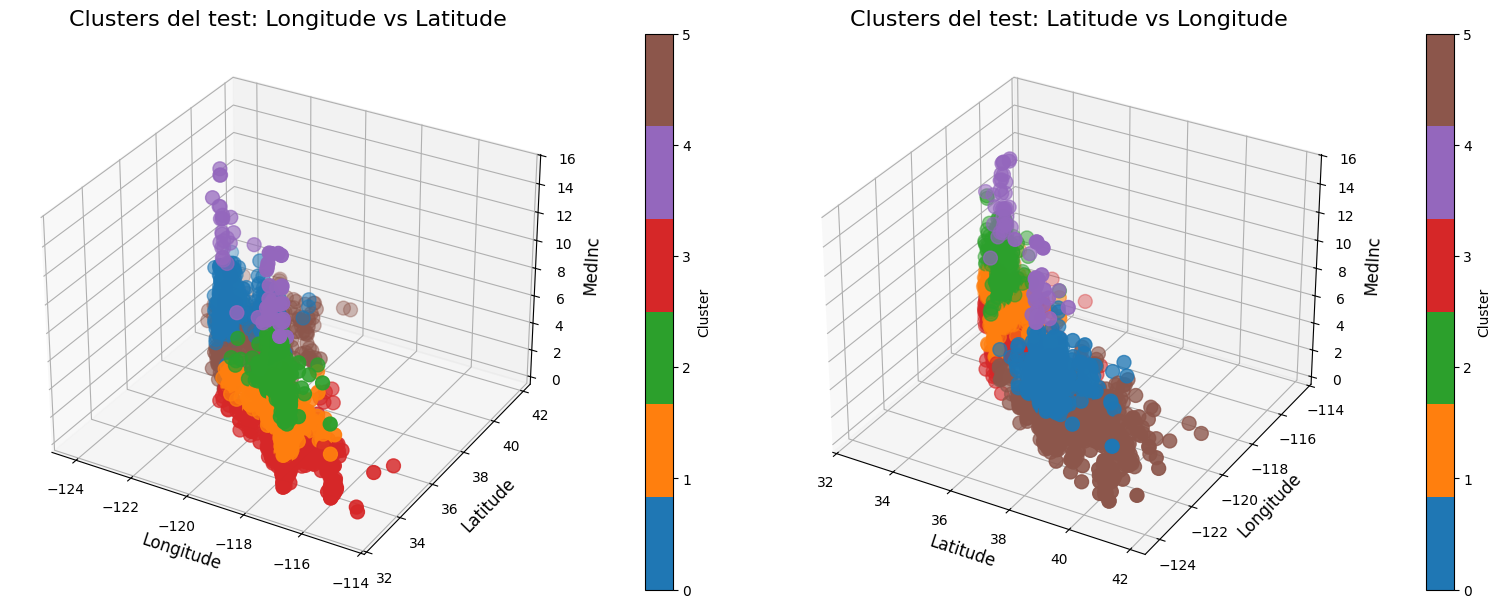

In [49]:
# Crear un colormap con 6 colores
cmap = ListedColormap(cm.get_cmap('tab10').colors[:6])

# Configurar los subplots
fig = plt.figure(figsize=(16, 6))  # Ajusta el tamaño (ancho, alto)

# Primer gráfico: Longitude vs Latitude
ax1 = fig.add_subplot(121, projection='3d')  # 1 fila, 2 columnas, posición 1
scatter1 = ax1.scatter(
    df_test['Longitude'], df_test['Latitude'], df_test['MedInc'],
    c=df_test['predictions'].cat.codes,  # Convertir a códigos numéricos para colores
    cmap=cmap, s=100
)
ax1.set_title('Clusters del test: Longitude vs Latitude', fontsize=16)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)
ax1.set_zlabel('MedInc', fontsize=12)

# Barra de colores para el primer gráfico
cbar1 = plt.colorbar(scatter1, ax=ax1, pad=0.1)  # Pad ajusta la distancia entre barra y gráfico
cbar1.set_ticks(range(6))
cbar1.set_ticklabels([0, 1, 2, 3, 4, 5])
cbar1.set_label('Cluster')

# Segundo gráfico: Latitude vs Longitude
ax2 = fig.add_subplot(122, projection='3d')  # 1 fila, 2 columnas, posición 2
scatter2 = ax2.scatter(
    df_test['Latitude'], df_test['Longitude'], df_test['MedInc'],
    c=df_test['predictions'].cat.codes,  # Convertir a códigos numéricos para colores
    cmap=cmap, s=100
)
ax2.set_title('Clusters del test: Latitude vs Longitude', fontsize=16)
ax2.set_xlabel('Latitude', fontsize=12)
ax2.set_ylabel('Longitude', fontsize=12)
ax2.set_zlabel('MedInc', fontsize=12)

# Barra de colores para el segundo gráfico
cbar2 = plt.colorbar(scatter2, ax=ax2, pad=0.1)
cbar2.set_ticks(range(6))
cbar2.set_ticklabels([0, 1, 2, 3, 4, 5])
cbar2.set_label('Cluster')

# Mostrar los gráficos
plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()

Podemos visualizar que el modelo clasifica bastante bien, tiene un comportamiento parecido al conjunto de entrenamiento.

### Dataframe unificado

In [53]:
# Renombrar la columna 'predictions' a 'cluster'
df_test.rename(columns={'predictions': 'cluster'}, inplace=True)

# Concatenar los DataFrames por filas
df_junto = pd.concat([df_train, df_test], axis=0)  # axis=0 significa unir por filas

# Reiniciar los índices del DataFrame unificado (opcional)
df_junto.reset_index(drop=True, inplace=True)

df_junto

,Latitude,Longitude,MedInc,cluster
0,32.71,-117.03,3.2596,3
1,33.77,-118.16,3.8125,1
2,34.66,-120.48,4.1563,1
3,32.69,-117.11,1.9425,3
4,36.78,-119.80,3.5542,5
...,...,...,...,...
20635,33.36,-117.22,4.6050,1
20636,35.36,-120.83,2.7266,5
20637,37.31,-122.05,9.2298,4
20638,36.77,-119.76,2.7850,5


/tmp/ipykernel_2602/1113371313.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(cm.get_cmap('tab10').colors[:6])


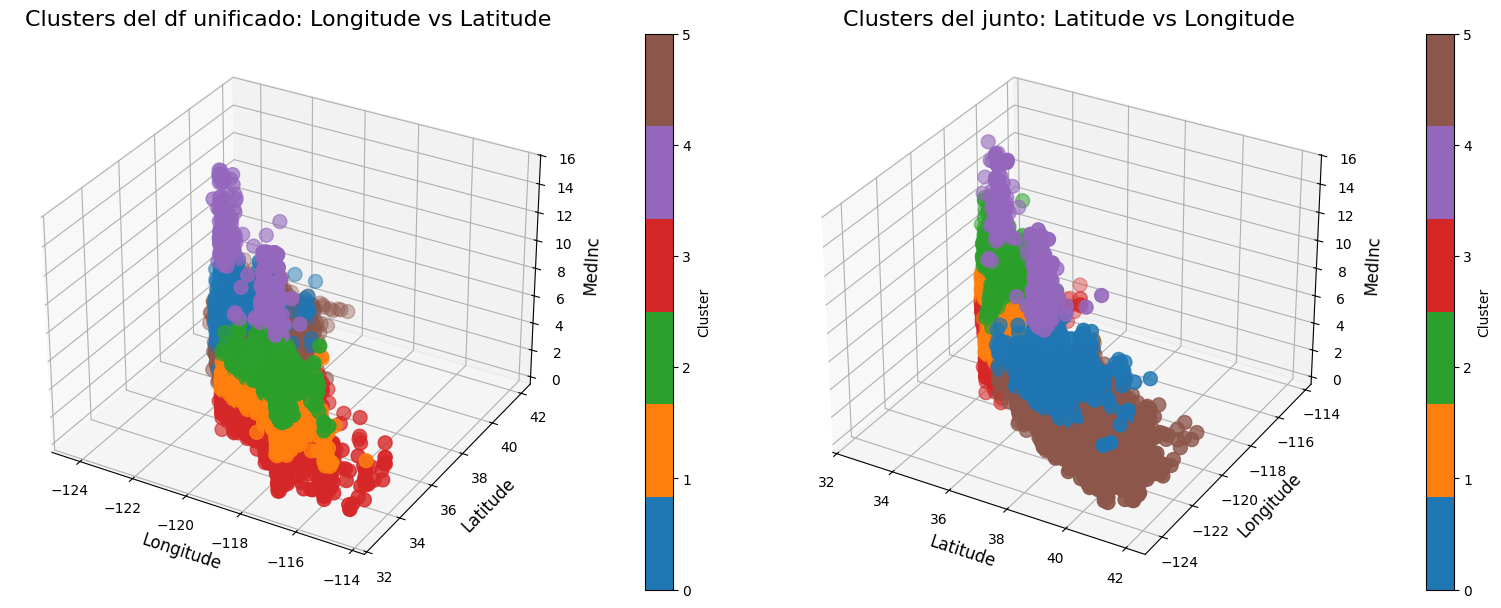

In [55]:
# Crear un colormap con 6 colores
cmap = ListedColormap(cm.get_cmap('tab10').colors[:6])

# Configurar los subplots
fig = plt.figure(figsize=(16, 6))  # Ajusta el tamaño (ancho, alto)

# Primer gráfico: Longitude vs Latitude
ax1 = fig.add_subplot(121, projection='3d')  # 1 fila, 2 columnas, posición 1
scatter1 = ax1.scatter(
    df_junto['Longitude'], df_junto['Latitude'], df_junto['MedInc'],
    c=df_junto['cluster'].cat.codes,  # Convertir a códigos numéricos para colores
    cmap=cmap, s=100
)
ax1.set_title('Clusters del df unificado: Longitude vs Latitude', fontsize=16)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)
ax1.set_zlabel('MedInc', fontsize=12)

# Barra de colores para el primer gráfico
cbar1 = plt.colorbar(scatter1, ax=ax1, pad=0.1)  # Pad ajusta la distancia entre barra y gráfico
cbar1.set_ticks(range(6))
cbar1.set_ticklabels([0, 1, 2, 3, 4, 5])
cbar1.set_label('Cluster')

# Segundo gráfico: Latitude vs Longitude
ax2 = fig.add_subplot(122, projection='3d')  # 1 fila, 2 columnas, posición 2
scatter2 = ax2.scatter(
    df_junto['Latitude'], df_junto['Longitude'], df_junto['MedInc'],
    c=df_junto['cluster'].cat.codes,  # Convertir a códigos numéricos para colores
    cmap=cmap, s=100
)
ax2.set_title('Clusters del junto: Latitude vs Longitude', fontsize=16)
ax2.set_xlabel('Latitude', fontsize=12)
ax2.set_ylabel('Longitude', fontsize=12)
ax2.set_zlabel('MedInc', fontsize=12)

# Barra de colores para el segundo gráfico
cbar2 = plt.colorbar(scatter2, ax=ax2, pad=0.1)
cbar2.set_ticks(range(6))
cbar2.set_ticklabels([0, 1, 2, 3, 4, 5])
cbar2.set_label('Cluster')

# Mostrar los gráficos
plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()

Podemos verificar un buen comportamiento del modelo.